# Fixed Wing Electric sUAS Sizing 
By Matthew Capece

Based on Lecture Notes of Dr. Mark Maughmer

### Setup

##### Imports

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi

##### Constants

In [64]:
# Physical Constants
gravity = 9.80665               # m/s^2 

# Standard Sea Level Atmosphere
density = 1.225                 # kg/m^3
temp_C = 15                     # C
temp_K = 288.2                  # K
pressure = 101325               # Pa
speed_of_sound = 340.3          # m/s
dynamic_viscosity = 1.789e-5    # kg/m/s
kinematic_viscosity = 1.460e-5  # m^2/s
gas_constant = 287.1            # J/kg/K
temp_lapse_rate = 0.0065        # K/m
molar_mass = 0.0289652          # kg/mol
ratio_of_specific_heats = 1.4   # unitless

### Mission Requirements

In [65]:
# Performance Requirements
range = 29              # km
endurance = 30          # min
m_payload = 2.7         # kg, payload mass (not required to fly)
v_stall = 12            # m/s, stall speed
v_cruise = 18           # m/s, cruise speed
dist_to_roll = 10       # m
dist_land_roll = 20     # m
radius_turn = 30        # m
angle_climb_min = 20    # deg
angle_descent_min = 20  # deg
wing_loading_max = 150  # g/dm^2, Wing loading using mass (NOT WEIGHT)

# Size Requirements
m_to_max = 25           # kg, takeoff (total) mass
span_max = 2.5          # m

# Calculations
dynamic_pressure_cruise = 1/2 * density * v_cruise**2
bank_angle_max_rad = np.arctan(v_cruise**2/ (gravity * radius_turn))  # Max bank angle required for a sustained level turn with specified truning radius
bank_angle_max_deg = bank_angle_max_rad * 180 / pi
bank_load_factor_max = 1 / np.cos(bank_angle_max_rad)

### Initial Estimates

##### Initial Size Estimates

In [66]:
# Based on experience and knowledge of similar aircraft
chord_inital = .3  # m
span_initial = 2   # m
m_to_initial = 7   # kg
e0_inital = .75    # Oswald Efficiency
Cdo_initial = .02  # Parasite drag coefficient

AR_initial = span_initial**2 / chord_inital

##### Initial Reynold's # Estimation

In [67]:
Re_cruise_inital = (density * v_cruise * chord_inital) / dynamic_viscosity
Re_stall_inial = (density * v_stall * chord_inital) / dynamic_viscosity

##### Initial Airfoil Selection

In [68]:
# Airfoil: psu94097-il
Cl_max = 1.4
Cl_max_flaps = 1.8

### Constraint Diagrams

C:\Users\mbcap\AppData\Local\Temp\ipykernel_19396\1886597129.py:12: RuntimeWarning: divide by zero encountered in true_divide
  thrust_to_weight_bank_array = ((bank_load_factor_max * k_initial * wing_loading_array) / dynamic_pressure_cruise)**2 + dynamic_pressure_cruise * Cdo_initial / wing_loading_array  # Sustained turn equation


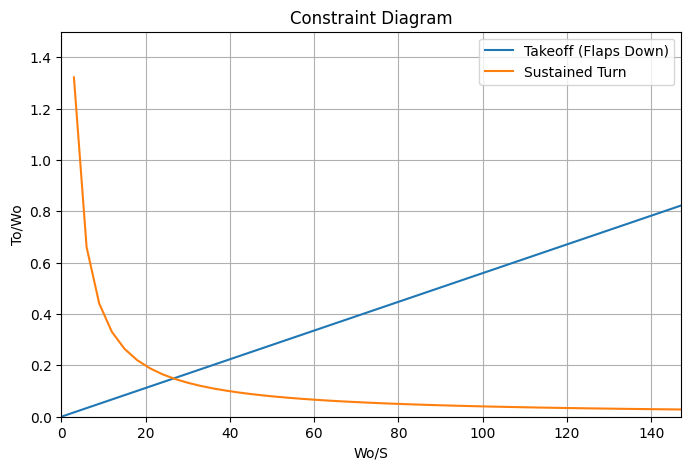

In [69]:
# Data Range
wing_loading_weight_max = wing_loading_max / 10 * gravity  # N/m^2, Wing Loading in terms of weight (NOT MASS) 
wing_loading_array = np.linspace(0, wing_loading_weight_max)  #g/dm^2, Plotted Wing Loading Range

# Takeoff Calculation
thrust_to_weight_to_array = wing_loading_array * [1.21 / (gravity * density * Cl_max_flaps * dist_to_roll)]  # Takeoff Curve WITH FLAPS

# Landing Calculation

#Stall Speed???

# Sustained Turn Calculation
k_initial = 1 / (e0_inital * pi * AR_initial)
thrust_to_weight_bank_array = ((bank_load_factor_max * k_initial * wing_loading_array) / dynamic_pressure_cruise)**2 + dynamic_pressure_cruise * Cdo_initial / wing_loading_array  # Sustained turn equation


# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(wing_loading_array, thrust_to_weight_to_array, label='Takeoff (Flaps Down)')
ax.plot(wing_loading_array, thrust_to_weight_bank_array, label='Sustained Turn')
ax.set_xlim([0,wing_loading_array[-1]])
ax.set_ylim([0,1.5])
ax.set_title('Constraint Diagram')
ax.set_xlabel('Wo/S')
ax.set_ylabel('To/Wo')
#ax.vlines(, 0, 3, label = '2')  FOR LANDING CURVE???
ax.grid()
ax.legend()





### Stall Speed???

### Initial Shape Estimates

In [70]:
# Airfoil Selection
# Wing Geometry
# Tail Geometry
# Power Plants
# High Lift Devices

### Battery Weight Estimate

In [71]:
# Use Breguet Range Equation

### L/D Estimate

### Takeoff Weight Estimate

### Preliminary Wing Design

In [72]:
# Wing Area
# Wing Loading
# Plots
# Choose Aspect Ratio

### Tail Sizing

### Performance Calculations